In [417]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import numpy as np


In [418]:
file_path = r"C:/Users/HP/Downloads/banking Data.csv"   # <-- update path if needed
df = pd.read_csv (r"C:/Users/HP/Downloads/banking Data.csv")
print(df.head())
print(df.info())


  Client ID             Name  Age     Sex  Location ID Joined Bank  \
0  PKR81288    Raymond Mills   24    Male        34324  05/06/2019   
1  PKR65833    Julia Spencer   23    Male        42205  12/10/2001   
2  PKR47499   Stephen Murray   27  Female         7314  01/25/2010   
3  PKR72498   Virginia Garza   40    Male        34594  03/28/1993   
4  PKR60181  Melissa Sanders   46  Female        41269  07/20/2012   

    Banking Contact Nationality            Occupation Investment Advisor  ...  \
0    Anthony Torres    American  Safety Technician IV        Victor Dean  ...   
1  Jonathan Hawkins     African   Software Consultant      Jeremy Porter  ...   
2     Anthony Berry    European    Help Desk Operator      Ernest Knight  ...   
3        Steve Diaz    American          Geologist II          Eric Shaw  ...   
4        Shawn Long    American   Assistant Professor          Kevin Kim  ...   

  Amount of Credit Cards Credit Card Balance    Bank Loans  Bank Deposits  \
0              

In [419]:
# Choose numeric and group column
numeric_col = "Estimated Income"   # numeric variable
group_col = "Sex"                  # grouping variable (Male/Female)

In [420]:
# Drop missing values
df = df.dropna(subset=[numeric_col, group_col])

# Check groups
print("\nUnique values in group column:")
print(df[group_col].unique())


Unique values in group column:
['Male' 'Female']


In [421]:
# Show column names clearly
print("\nColumn names in dataset:")
for col in df.columns:
    print(f"- {col}")


Column names in dataset:
- Client ID
- Name
- Age
- Sex
- Location ID
- Joined Bank
- Banking Contact
- Nationality
- Occupation
- Investment Advisor
- Fee Structure
- Loyalty Classification
- Banking Relationship
- Estimated Income
- Superannuation Savings
- Amount of Credit Cards
- Credit Card Balance
- Bank Loans
- Bank Deposits
- Checking Accounts
- Saving Accounts
- Foreign Currency Account
- Business Lending
- Properties Owned
- Risk Weighting


In [422]:
# Split into groups
groups = df[group_col].unique()
if len(groups) != 2:
    raise ValueError(f"Expected 2 groups for t-test, but found: {groups}")

group1 = df[df[group_col] == groups[0]][numeric_col]
group2 = df[df[group_col] == groups[1]][numeric_col]

print(f"\nComparing groups: {groups[0]} vs {groups[1]}")


Comparing groups: Male vs Female


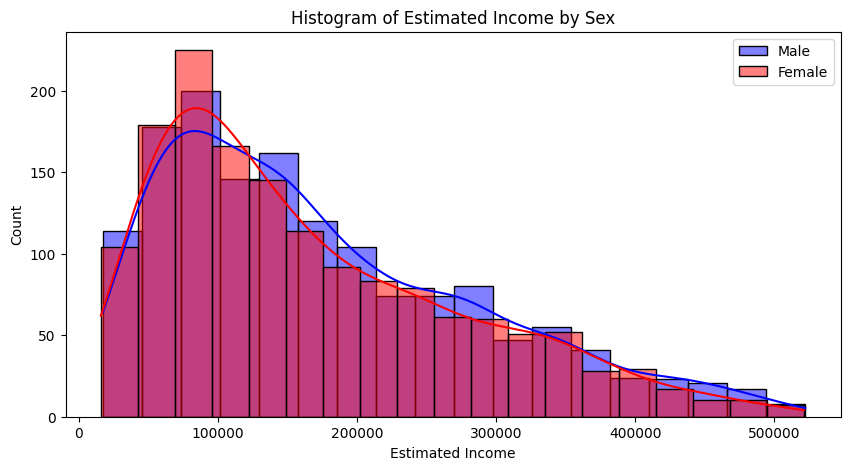

In [423]:
# Histogram + KDE
plt.figure(figsize=(10,5))
sns.histplot(group1, kde=True, color="blue", label=str(groups[0]))
sns.histplot(group2, kde=True, color="red", label=str(groups[1]))
plt.title(f"Histogram of {numeric_col} by {group_col}")
plt.legend()
plt.show()

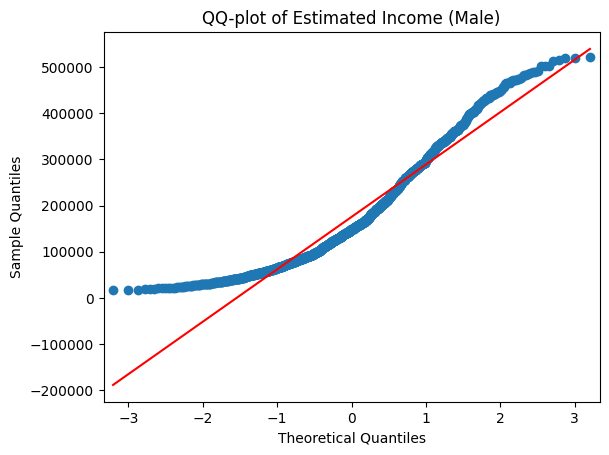

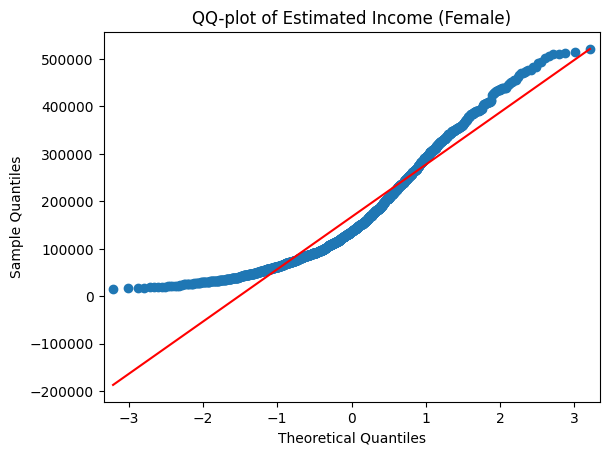

In [424]:
# QQ-plots
sm.qqplot(group1, line='s')
plt.title(f"QQ-plot of {numeric_col} ({groups[0]})")
plt.show()

sm.qqplot(group2, line='s')
plt.title(f"QQ-plot of {numeric_col} ({groups[1]})")
plt.show()

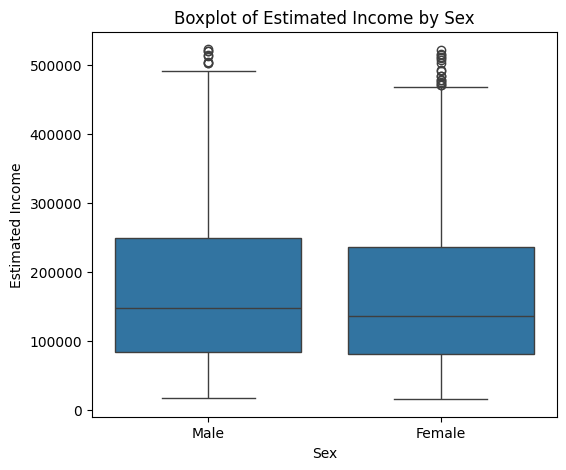

In [425]:
# Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(x=group_col, y=numeric_col, data=df)
plt.title(f"Boxplot of {numeric_col} by {group_col}")
plt.show()

In [426]:
# T-test
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
print("\nTwo-sample independent t-test results:")
print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")


Two-sample independent t-test results:
T-statistic = 1.978, p-value = 0.0480


In [427]:
# Effect size (Cohen's d)
def cohen_d(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx-1)*np.var(x, ddof=1) + (ny-1)*np.var(y, ddof=1)) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std
d = cohen_d(group1, group2)
print(f"Cohen's d = {d:.3f}")


Cohen's d = 0.072


In [428]:
# 95% Confidence Interval
cm = sms.CompareMeans(sms.DescrStatsW(group1), sms.DescrStatsW(group2))
ci_low, ci_high = cm.tconfint_diff(usevar='unequal')
print(f"95% CI for mean difference: ({ci_low:.3f}, {ci_high:.3f})")

95% CI for mean difference: (70.972, 16095.852)


In [429]:
# --- Choose columns ---
group_col = "Sex"   # fixed grouping variable
numeric_cols = ["Estimated Income", "Credit Card Balance", "Age"]  # list of numeric variables to test


In [430]:
# --- Function for analysis ---
def run_ttest(df, numeric_col, group_col="Sex"):
    print("\n" + "="*50)
    print(f"Analysis for numeric variable: {numeric_col}")

In [431]:
# Drop missing values
df_clean = df.dropna(subset=[numeric_col, group_col])

In [432]:
#groups
groups = df_clean[group_col].unique()
if len(groups) != 2:
        raise ValueError(f"Expected 2 groups, found {groups}")

group1 = df_clean[df_clean[group_col] == groups[0]][numeric_col]
group2 = df_clean[df_clean[group_col] == groups[1]][numeric_col]

print(f"Comparing groups: {groups[0]} vs {groups[1]}")


Comparing groups: Male vs Female


In [433]:
 #--- Run analysis for each numeric column ---
for col in numeric_cols:
    run_ttest(df, col, group_col)


Analysis for numeric variable: Estimated Income

Analysis for numeric variable: Credit Card Balance

Analysis for numeric variable: Age


In [434]:
# --- Choose columns ---
group_col = "Sex"   # fixed grouping variable
numeric_cols = ["Estimated Income", "Credit Card Balance", "Age"]  # list of numeric variables to test

# --- Function for analysis ---
def run_ttest(df, numeric_col, group_col="Sex"):
    print("\n" + "="*60)
    print(f"Analysis for numeric variable: {numeric_col}")

In [435]:
 # Drop missing values
df_clean = df.dropna(subset=[numeric_col, group_col])

In [436]:
# Groups
groups = df_clean[group_col].unique()
if len(groups) != 2:
        raise ValueError(f"Expected 2 groups, found {groups}")

group1 = df_clean[df_clean[group_col] == groups[0]][numeric_col]
group2 = df_clean[df_clean[group_col] == groups[1]][numeric_col]
print(f"Comparing groups: {groups[0]} vs {groups[1]}")

Comparing groups: Male vs Female


In [437]:
 # --- Assumption Checks ---
print("\n--- Assumption Checks ---")


--- Assumption Checks ---


In [438]:
 # Shapiro-Wilk test for normality
shapiro1 = stats.shapiro(group1)
shapiro2 = stats.shapiro(group2)
print(f"{groups[0]}: Shapiro-Wilk W={shapiro1[0]:.3f}, p={shapiro1[1]:.4f}")
print(f"{groups[1]}: Shapiro-Wilk W={shapiro2[0]:.3f}, p={shapiro2[1]:.4f}")

Male: Shapiro-Wilk W=0.926, p=0.0000
Female: Shapiro-Wilk W=0.918, p=0.0000


In [439]:
# Levene’s test for equality of variances
levene_test = stats.levene(group1, group2)
print(f"Levene’s test: W={levene_test[0]:.3f}, p={levene_test[1]:.4f}")

Levene’s test: W=0.945, p=0.3310


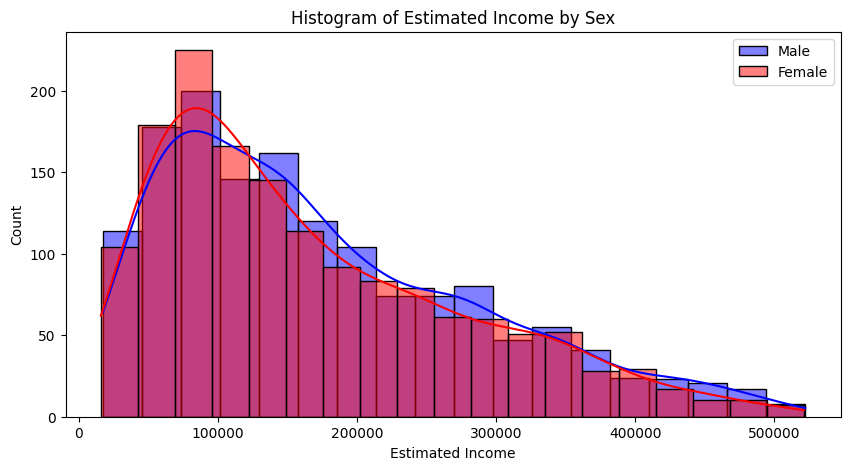

In [440]:
# --- Visualization ---
plt.figure(figsize=(10,5))
sns.histplot(group1, kde=True, color="blue", label=str(groups[0]))
sns.histplot(group2, kde=True, color="red", label=str(groups[1]))
plt.title(f"Histogram of {numeric_col} by {group_col}")
plt.legend()
plt.show()

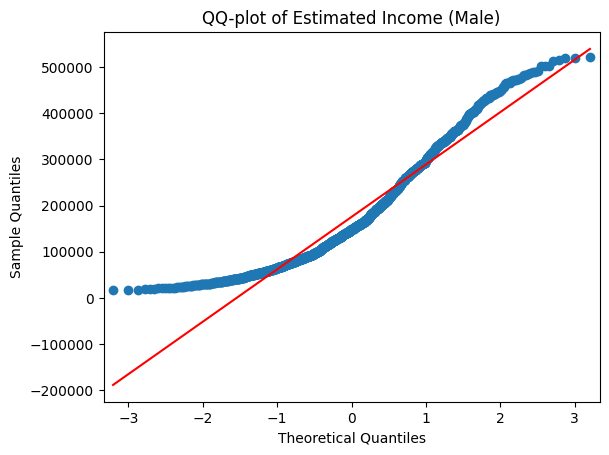

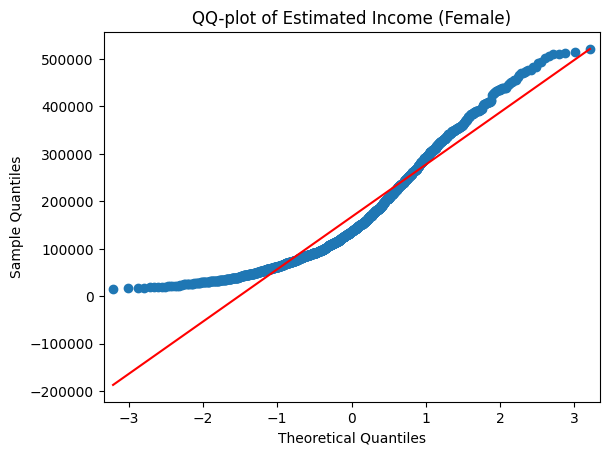

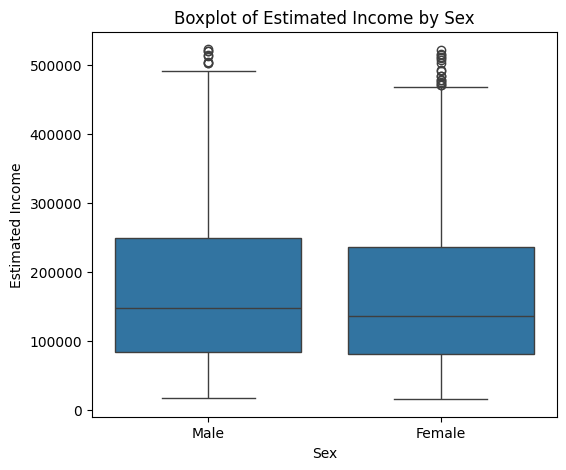

In [441]:
sm.qqplot(group1, line='s')
plt.title(f"QQ-plot of {numeric_col} ({groups[0]})")
plt.show()

sm.qqplot(group2, line='s')
plt.title(f"QQ-plot of {numeric_col} ({groups[1]})")
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(x=group_col, y=numeric_col, data=df_clean)
plt.title(f"Boxplot of {numeric_col} by {group_col}")
plt.show()


In [442]:
 # --- Statistical Analysis ---
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
print("\n--- T-test Results ---")
print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")



--- T-test Results ---
T-statistic = 1.978, p-value = 0.0480
